In [1]:
#Part 1 - 데이터 전처리

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
df=pd.read_csv("Google_Stock_Price_Train.csv")
df

                                                                                                                             
    

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:

training_set = df.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler     #0과1사이로 데이터를 스케일링 
sc = MinMaxScaler(feature_range = (0, 1))          #스케일링 신경망속도를 향상시키고 최적의 성능을 얻기위해필요
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [18]:
X_train.shape

(1198, 60, 1)

## 모르는 거 정리

- 1. fit() 메소드는 데이터의 최솟값(min)과 최댓값(max)을 계산하여 스케일링을 위한 변환 파라미터를 계산합니다.
  transform() 메소드는 fit()에서 계산된 변환 파라미터를 사용하여 데이터를 스케일링합니다.
- 2. X_train.append(training_set_scaled[i-60:i, 0]) 이는 open이라는 칼럼값을 현재 날짜부터 -60일전까지 순회하여 x타겟에넣고
- 지난 60일의 데이터를 이용하여 y타겟은 현제 값을 예측한다


In [17]:
# 재구성 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 
# LSTM을 사용하기 위해 3차원 형태로 핀다

In [19]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [21]:
# 2부 - RNN 구축

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
# Initialising the RNN
regressor = Sequential()

# LSTM 레이어와 Dropout 정규화 추가하기
ㅊ
# 두 번째 LSTM 레이어와 Dropout 정규화 추가하기    #삭제 게이트, 입력 게이트, 출력 게이트는 각 LSTM 셀 내부에 포함
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# return_sequences= 매개변수를 다음충으로 전달할지 여부를 확인 Dropout(0.2)일부의 층을 떨굼 

# 세 번째 LSTM 레이어와 Dropout 정규화 추가하기
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 네 번째 LSTM 레이어와 Dropout 정규화 추가하기
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# 출력 레이어 추가하기

regressor.add(Dense(units = 1))

#RNN 컴파일하기
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# RNN을 훈련 세트에 적합시키기
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Metal device set to: Apple M1
Epoch 1/100


2023-05-07 18:56:04.936217: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 4s 40ms/step - loss: 0.0442
Epoch 2/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0040
Epoch 3/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0031
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0025
Epoch 5/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0022
Epoch 6/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0023
Epoch 7/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0026
Epoch 8/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0022
Epoch 9/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0020
Epoch 10/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0022
Epoch 11/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0018
Epoch 12/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0018
Epoch 13/100
38/38 [=================

## LSTM셀 

1/1 [==============================] - 0s 27ms/step


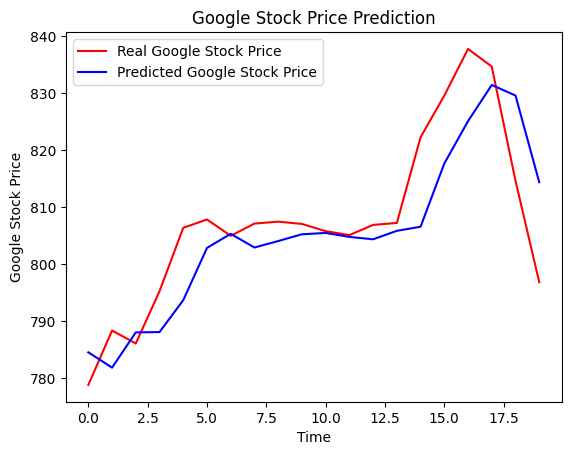

In [29]:
# Part 3 - 예측하고 결과 시각화하기

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

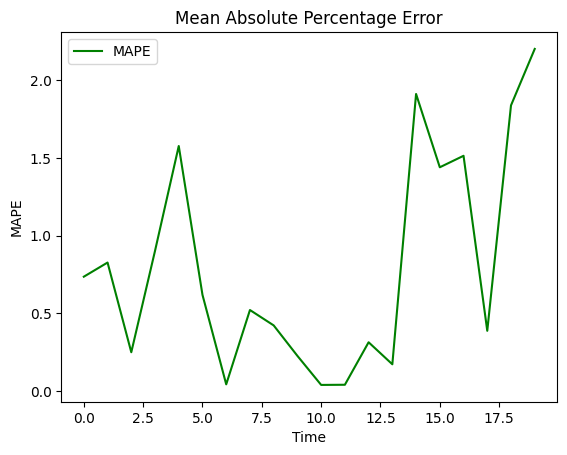

In [30]:
# Calculate the absolute errors
errors = abs(predicted_stock_price - real_stock_price)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / real_stock_price)

# Plot MAPE
plt.plot(mape, color = 'green', label = 'MAPE')
plt.title('Mean Absolute Percentage Error')
plt.xlabel('Time')
plt.ylabel('MAPE')
plt.legend()
plt.show()


In [35]:
# Create a new dataframe with predicted open values
predicted_open = pd.DataFrame(predicted_stock_price, columns=['Open'])  # LSTM 모델로 예측한 open 값으로 새로운 데이터프레임 생성
predicted_open.index = dataset_test.index  # 예측 데이터 프레임의 인덱스를 dataset_test의 인덱스로 설정
predicted_open.index.name = 'Date'  # 예측 데이터 프레임의 인덱스 이름을 'Date'로 설정
dataset_test_predicted = pd.concat([dataset_test, predicted_open], axis=1)  # 예측한 open 값을 예측 데이터 프레임에 추가

# Save to a new csv file
dataset_test_predicted.to_csv('sample2.csv')  # 새로운 csv 파일로 저장


## 추가 참고 gpt선생님의 의견


예, 말씀하신 것처럼 모델이 너무 복잡해지면 과적합(overfitting)의 위험이 증가할 수 있습니다. 과적합은 모델이 학습 데이터에만 지나치게 적응하게 되어 새로운 데이터에 대한 예측 성능이 떨어지는 현상입니다.

따라서 깊이가 깊은 모델은 학습 데이터의 노이즈까지 학습할 수 있어 과적합이 발생할 가능성이 높아집니다. 이러한 이유로 적절한 균형을 찾아야 합니다. 즉, 모델이 충분한 복잡성을 가지고 있어 데이터의 패턴을 학습할 수 있으면서도, 과적합을 피할 수 있는 구조를 찾아야 합니다.

이 예제에서는 Dropout 층을 사용하여 과적합을 완화하려고 노력했습니다. Dropout 층은 학습 과정에서 일부 뉴런의 연결을 무작위로 끊어 과적합을 방지하는 기법입니다. 이로 인해 모델이 일부 노이즈에 덜 민감해지고 일반화 능력이 향상됩니다.

그러나 모델의 구조와 하이퍼파라미터는 문제와 데이터에 따라 다르게 설정해야 합니다. 따라서 최적의 구조를 찾으려면 교차 검증, 그리드 탐색, 랜덤 탐색 등 다양한 방법을 사용하여 실험해야 합니다. 이를 통해 과적합을 최소화하면서도 좋은 예측 성능을 달성할 수 있는 모델 구조를 찾을 수 있습니다.